In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('NFLX.csv')

In [3]:
data.shape 

(5474, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
1,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
3,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
4,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400


In [5]:
data.index 

RangeIndex(start=0, stop=5474, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

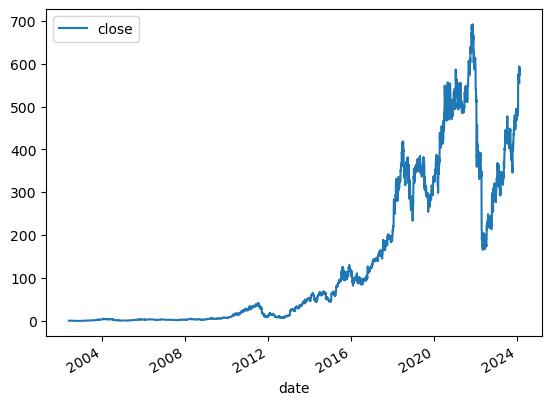

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('NFLX.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,5474.000000,5474.000000,5474.000000,5474.000000,5.474000e+03
mean,135.138571,137.218053,132.999956,135.159118,1.582162e+07
std,176.313861,178.821402,173.680377,176.281490,1.864882e+07
min,0.377857,0.410714,0.346429,0.372857,2.856000e+05
25%,4.141429,4.213214,4.061786,4.141429,5.878650e+06
50%,34.778572,35.277141,34.185712,34.827143,9.931300e+06
75%,266.487511,272.847511,262.542504,267.317498,1.873305e+07
max,692.349976,700.989990,686.090027,691.690002,3.234140e+08


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data['previousday']=data['close'].shift(1)

In [13]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,1.103571,NaN
2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,1.071429,1.157143
2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,1.076429,1.103571
2002-05-31,1.078571,1.078571,1.071429,1.076429,8464400,1.128571,1.071429
2002-06-03,1.080000,1.149286,1.076429,1.128571,3151400,1.117857,1.076429


In [14]:
train = data.iloc[:-200]
test = data.iloc[-200:]

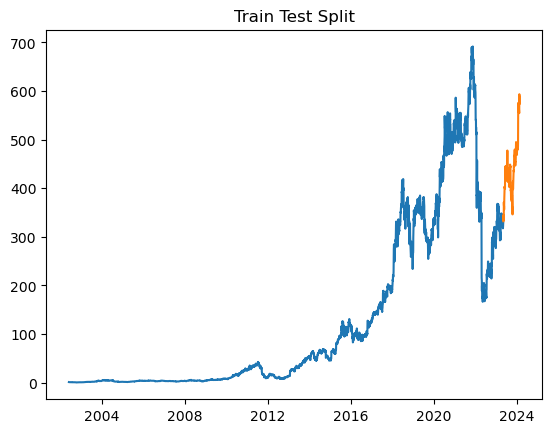

In [15]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [16]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [17]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [18]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 3.33
MAPE: 0.01
minae: 0.01
maxae: 16.38
medae: 2.75

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 4.03
MAPE: 0.01
minae: 0.00
maxae: 23.38
medae: 3.11

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 4.11
MAPE: 0.01
minae: 0.00
maxae: 14.56
medae: 3.49

Learning rate set to 0.346161
0:	learn: 114.0625099	total: 139ms	remaining: 13.8s
1:	learn: 76.7595172	total: 142ms	remaining: 6.95s
2:	learn: 51.4365156	total: 144ms	remaining: 4.65s
3:	learn: 35.1022563	total: 146ms	remaining: 3.5s
4:	learn: 24.2261748	total: 148ms	remaining: 2.82s
5:	learn: 17.5744578	total: 151ms	remaining: 2.37s
6:	learn: 13.4584714	total: 153ms	remaining: 2.04s
7:	learn: 10.5783161	total: 155ms	remaining: 1.79s
8:	learn: 9.1232652	total: 158ms	remaining: 1.6s
9:	learn: 8.3475268	total: 161ms	remaining: 1.45s
10:	learn: 7.8811812	total: 163ms	

#### Retrain the best Model(Extreme Gradient Boosting)

In [19]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [20]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [21]:
#combined_1.plot();
combined_2

,close,0
date,,
2023-05-09,332.140015,331.485062
2023-05-10,335.420013,331.485062
2023-05-11,344.760010,340.099276
2023-05-12,339.890015,341.192298
2023-05-15,335.890015,338.849344
...,...,...
2024-02-16,583.950012,590.180795
2024-02-20,575.130005,579.043038
2024-02-21,573.349976,567.843253


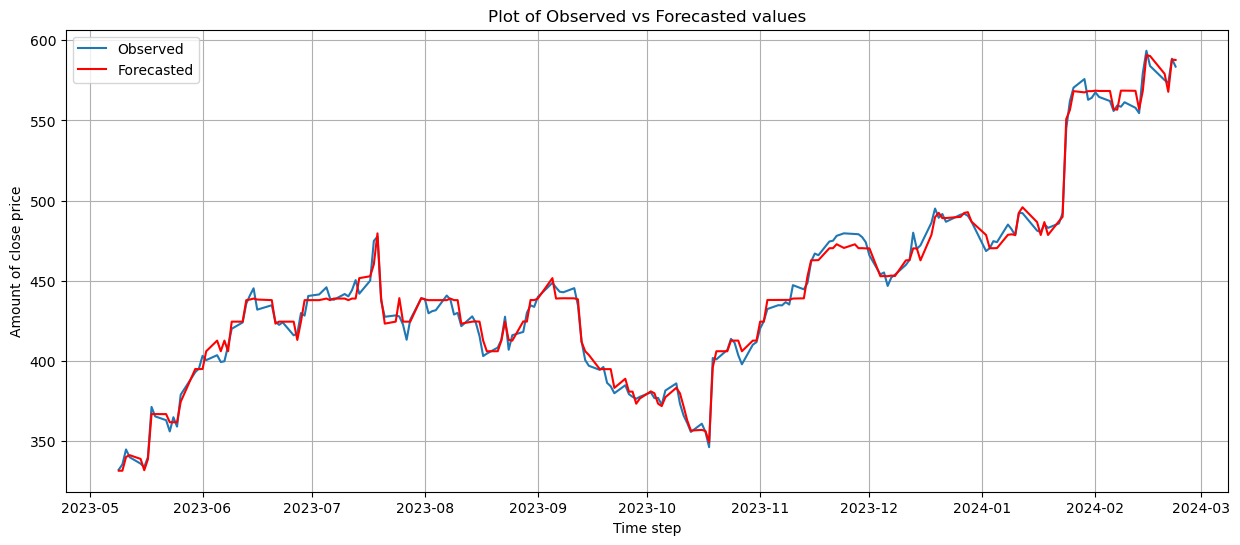

In [22]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [23]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [25]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [26]:
data['RSI']= computeRSI(data['close'], 14)

In [27]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,1.103571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,1.071429,1.157143,0.976303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,1.076429,1.103571,0.985222,2.260714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-31,1.078571,1.078571,1.071429,1.076429,8464400,1.128571,1.071429,1.002328,2.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-03,1.080000,1.149286,1.076429,1.128571,3151400,1.117857,1.076429,1.023647,2.147858,1.019091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.shape 

(5474, 19)

In [29]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
2002-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.157143,NaN
2002-05-29,0.976303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.103571,NaN
2002-05-30,0.985222,2.260714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.071429,NaN
2002-05-31,1.002328,2.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.076429,NaN
2002-06-03,1.023647,2.147858,1.019091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.128571,NaN


In [30]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [31]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [32]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [33]:
new_data=new_data.dropna()
new_data.shape 

(4474, 16)

In [34]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2006-05-16,1.003677,8.291429,0.972382,21.347143,1.014430,241.637144,1.181550,864.415717,1.618477,2526.777859,4.094286,-0.033063,4.128572,4.159286,2.528344,4.170651
2006-05-17,0.989956,8.158572,0.971636,21.052858,0.992878,242.162859,1.155771,866.295717,1.584466,2529.715002,4.012857,-0.051013,4.057143,4.099643,2.529825,4.162954
2006-05-18,0.993190,8.107143,0.972281,20.650001,0.978673,242.498573,1.137930,868.004288,1.561251,2532.624288,3.958571,-0.082450,4.021905,4.032500,2.531250,4.152984
2006-05-19,1.002879,7.971428,0.989842,20.357143,0.983075,242.690001,1.142189,869.687145,1.568470,2535.511430,3.981429,-0.061932,3.984286,4.011786,2.532694,4.144616
2006-05-22,1.002327,7.940000,0.997648,20.111429,0.986489,242.998573,1.144971,871.447145,1.574005,2538.416430,4.000000,-0.066356,3.980000,3.988214,2.534154,4.137561


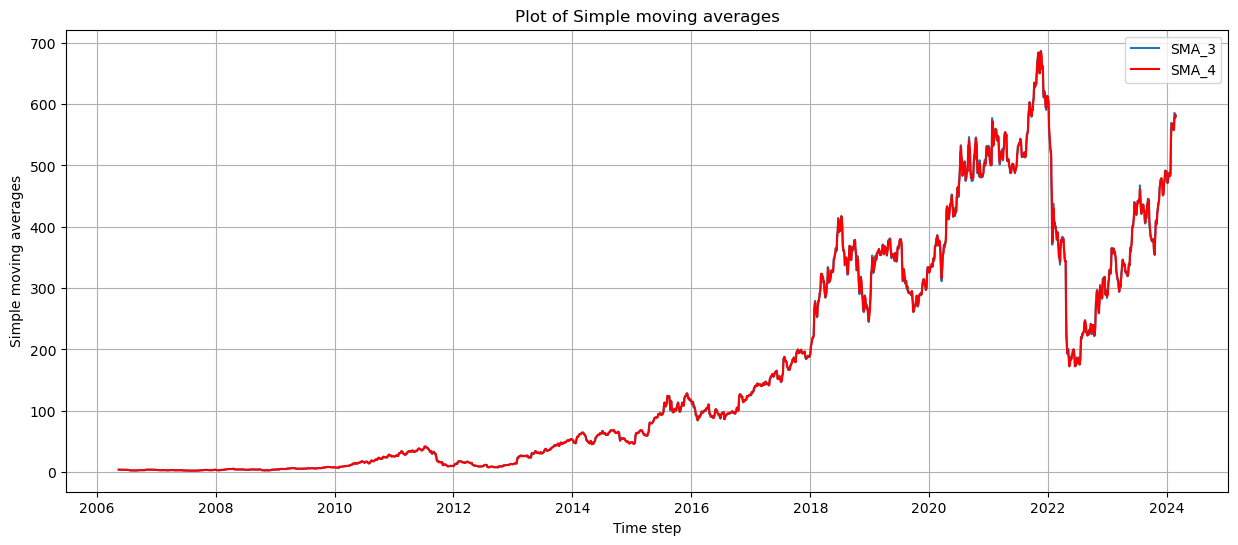

In [35]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

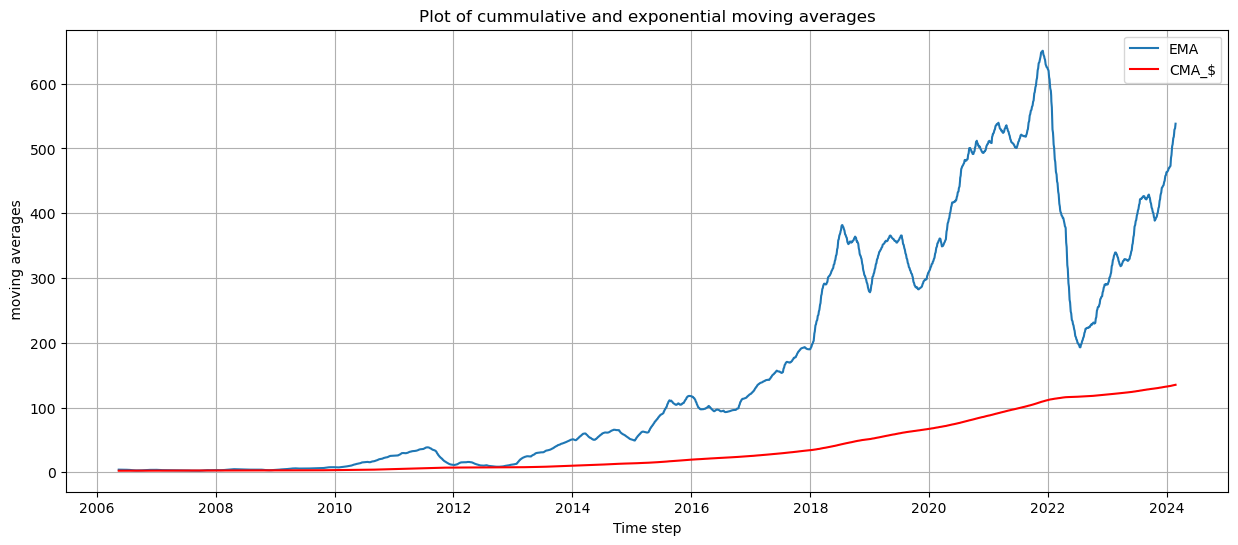

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

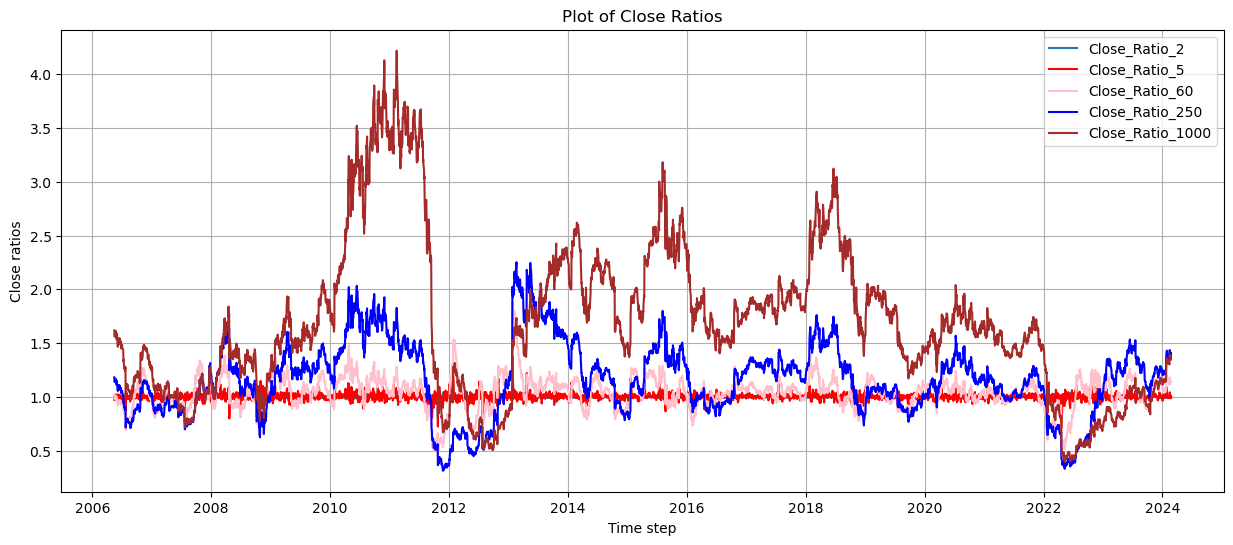

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

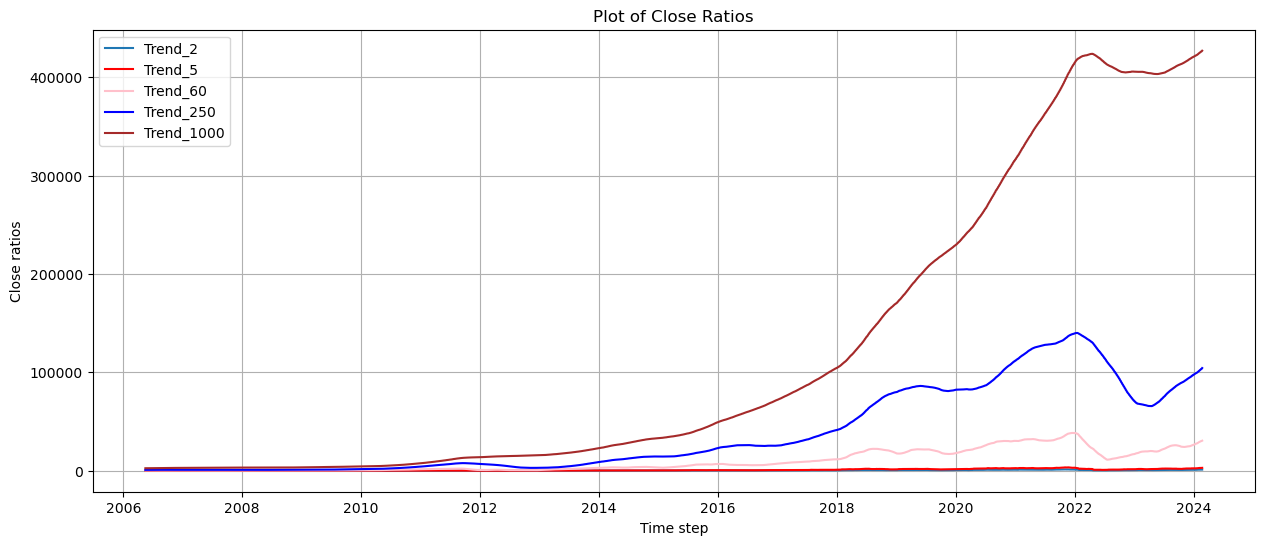

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [39]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

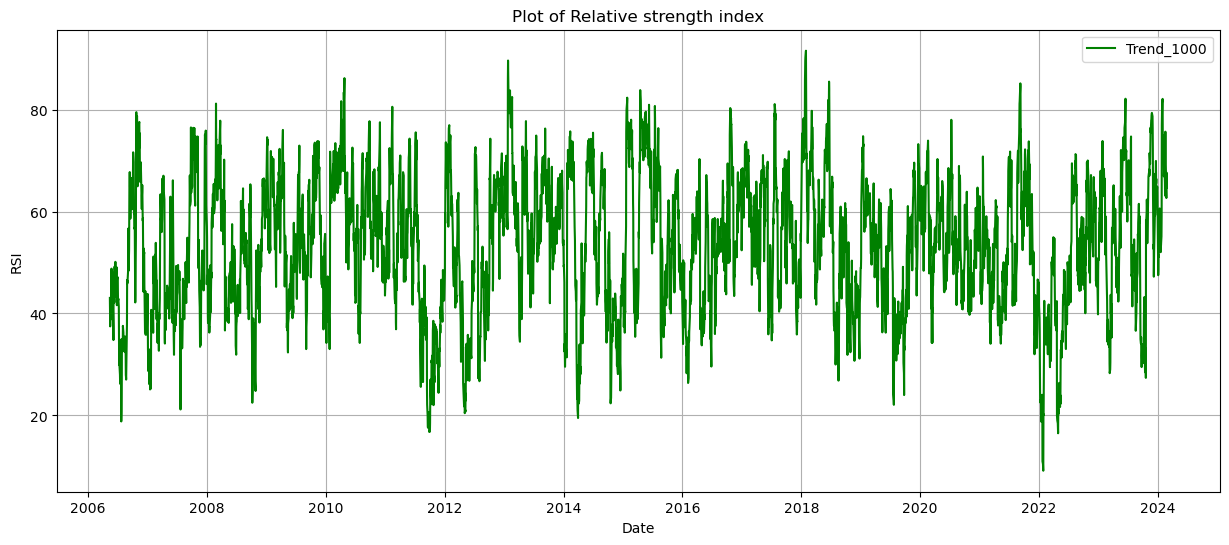

In [40]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

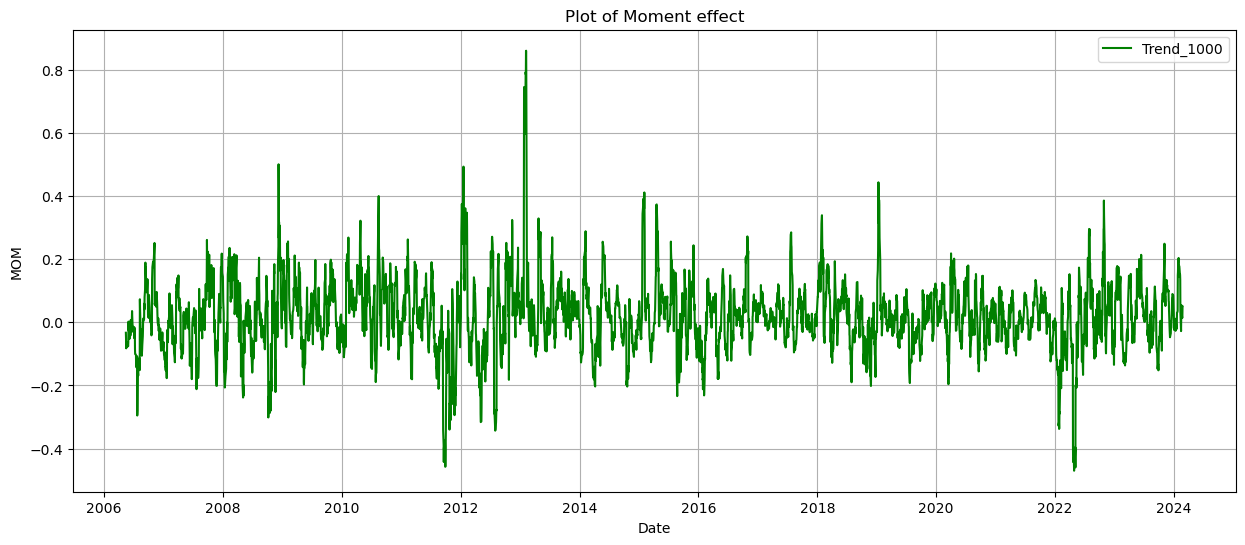

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [42]:
train = new_data.iloc[:-200]
test = new_data.iloc[-200:]

In [43]:
train.shape

(4274, 18)

In [44]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [45]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday' ] 

#### Retrain the models on the new predictors

In [46]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 5.41
MAPE: 0.01
minae: 0.03
maxae: 28.15
medae: 4.46

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 6.81
MAPE: 0.02
minae: 0.03
maxae: 31.81
medae: 5.68

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 6.40
MAPE: 0.01
minae: 0.01
maxae: 27.20
medae: 5.40

Learning rate set to 0.334851
0:	learn: 120.6930453	total: 3.33ms	remaining: 330ms
1:	learn: 82.8799665	total: 6.24ms	remaining: 306ms
2:	learn: 57.4345400	total: 8.97ms	remaining: 290ms
3:	learn: 40.5434968	total: 11.6ms	remaining: 279ms
4:	learn: 29.1125098	total: 14.2ms	remaining: 269ms
5:	learn: 21.6393136	total: 16.9ms	remaining: 264ms
6:	learn: 16.7280807	total: 20.7ms	remaining: 274ms
7:	learn: 13.0454525	total: 23.4ms	remaining: 269ms
8:	learn: 10.9594505	total: 25.9ms	remaining: 262ms
9:	learn: 9.8576680	total: 28.6ms	remaining: 257ms
10:	learn: 8.8813124	total: 31.1ms	remaining: 251ms
11:	learn: 

#### Improving the model

In [47]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [48]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [49]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [50]:
predictions_2 = backtest(new_data, model_2, predictors)

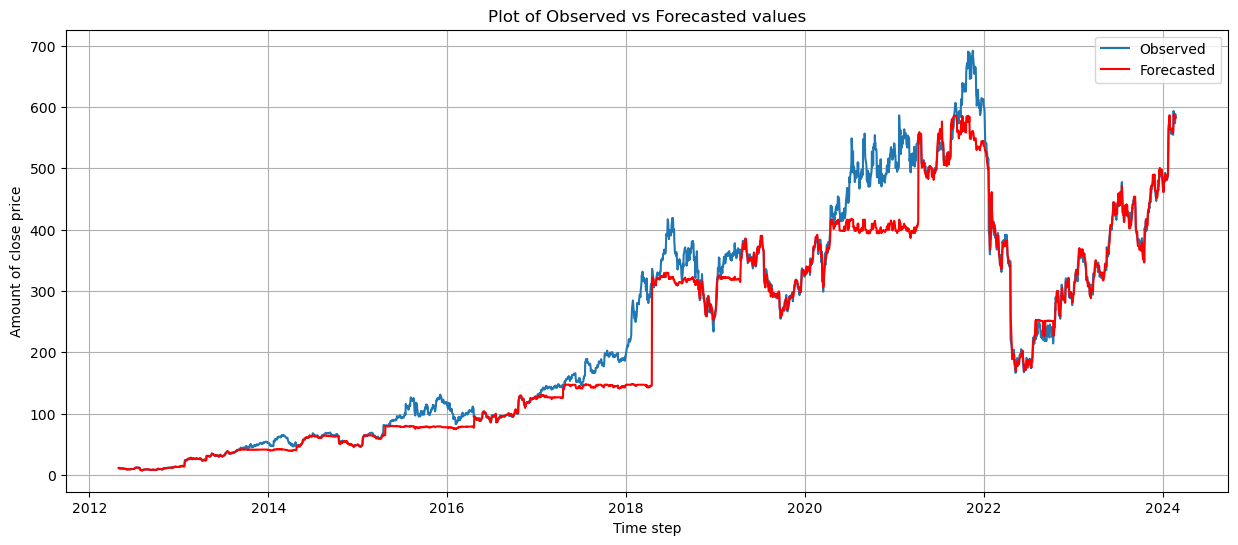

In [51]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [52]:
model_2.fit(train[predictors], train['close'])
prediction=model_2.predict(test[predictors])

In [53]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [54]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.01459015005569756

mean absolute  error is : 6.40012664354053



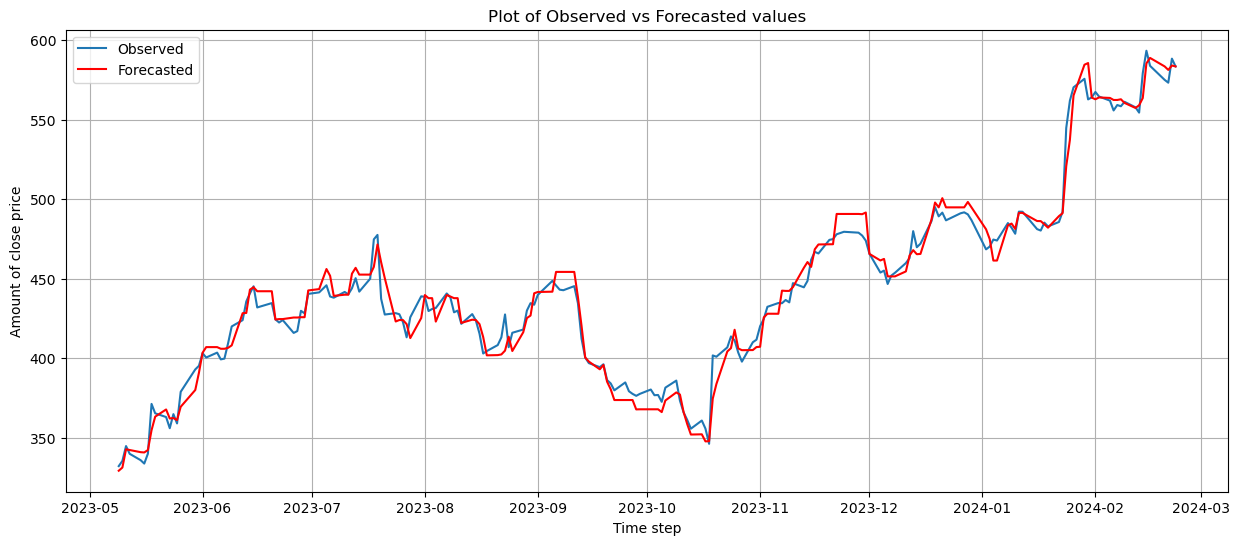

In [55]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [56]:
model = GradientBoostingRegressor(max_depth=7, n_estimators=350,  min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [57]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [58]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 6.078930795385577 
 gradientboost minae: 0.053000406113710596 
 gradientboost maxae: 28.29104666604769 
 gradientboost medae: 5.317239060626548 
 gradientboost Mape: 0.013801358242965822 
  

 <-------------------------------------------------->



In [59]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2023-05-09,332.140015,329.500091
2023-05-10,335.420013,330.629992
2023-05-11,344.760010,346.496327
2023-05-12,339.890015,339.386117
2023-05-15,335.890015,339.762556
...,...,...
2024-02-16,583.950012,589.532272
2024-02-20,575.130005,586.785980
2024-02-21,573.349976,579.887120


In [60]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [61]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.013801358242965822

mean absolute  error is : 6.078930795385577



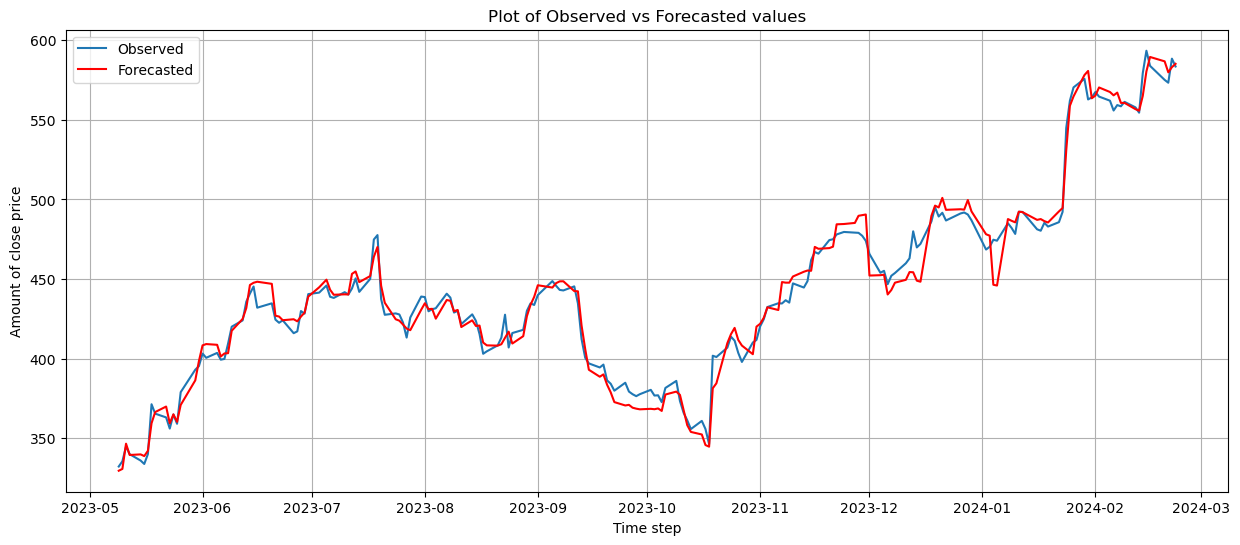

In [62]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [63]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 5.666169049500005 
 bagging minae: 0.008999499999958971 
 bagging maxae: 26.261993599999983 
 bagging medae: 4.225001699999979 
 bagging Mape: 0.012864626984561572 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 3.97380424260126 
 stacking minae: 0.004848465856980511 
 stacking maxae: 20.899187653600507 
 stacking medae: 2.7146822401929853 
 stacking mape: 0.009011102209567086 



In [64]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [65]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [66]:
combined_bagg

,close,0
date,,
2023-05-09,332.140015,328.101993
2023-05-10,335.420013,332.061997
2023-05-11,344.760010,345.733005
2023-05-12,339.890015,339.810995
2023-05-15,335.890015,337.687994
...,...,...
2024-02-16,583.950012,584.703003
2024-02-20,575.130005,578.781000
2024-02-21,573.349976,585.212012


In [67]:
combined_stack

,close,0
date,,
2023-05-09,332.140015,330.349962
2023-05-10,335.420013,337.418137
2023-05-11,344.760010,341.873603
2023-05-12,339.890015,340.241226
2023-05-15,335.890015,342.455020
...,...,...
2024-02-16,583.950012,590.238527
2024-02-20,575.130005,585.945671
2024-02-21,573.349976,574.723841


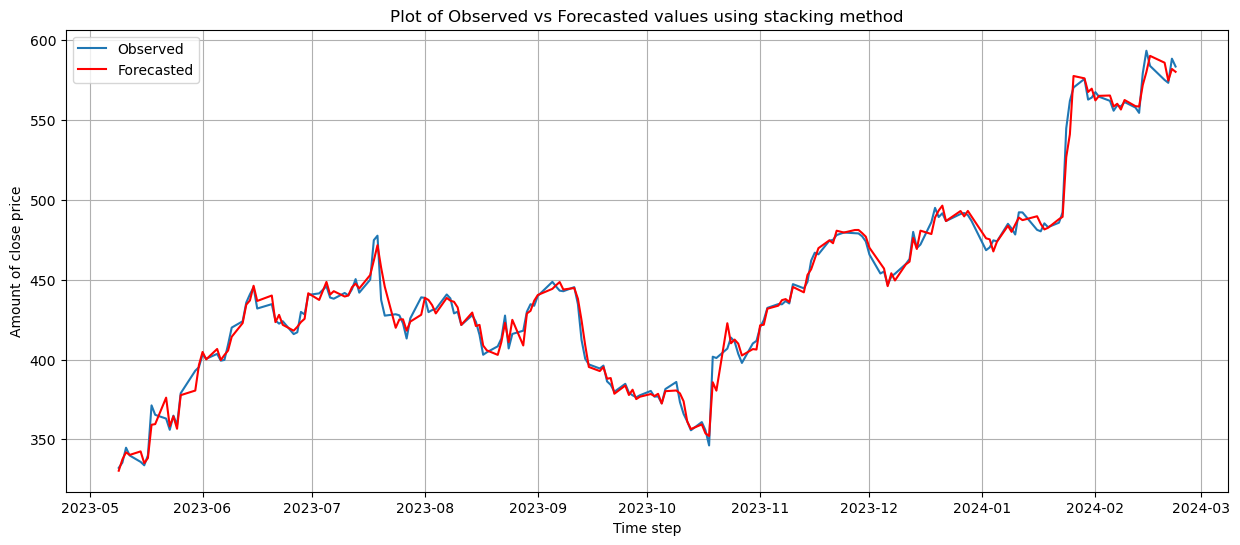

In [68]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

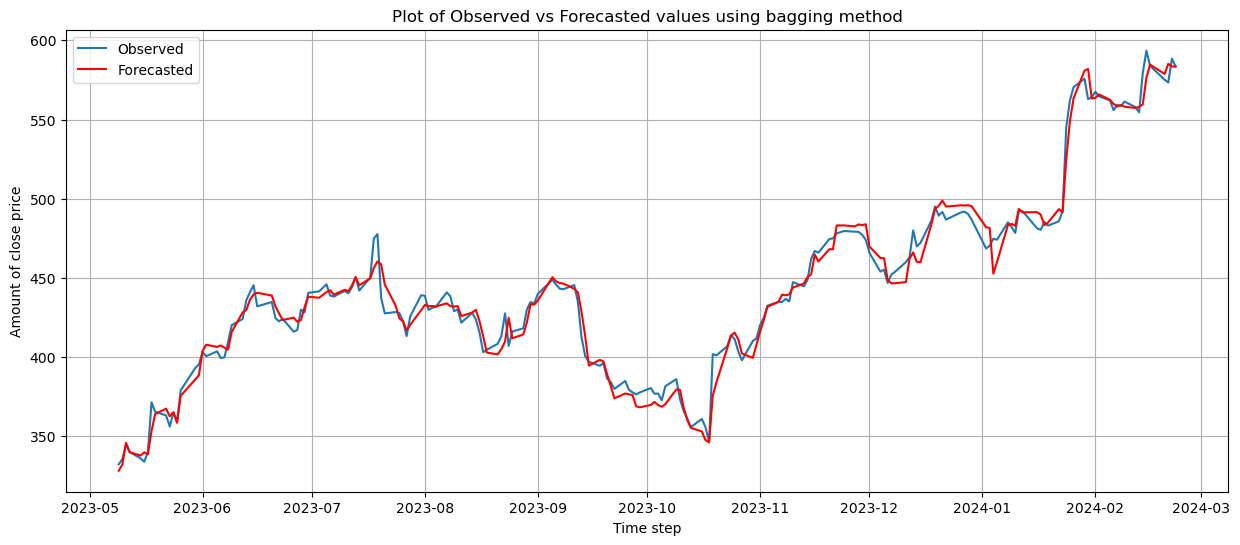

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

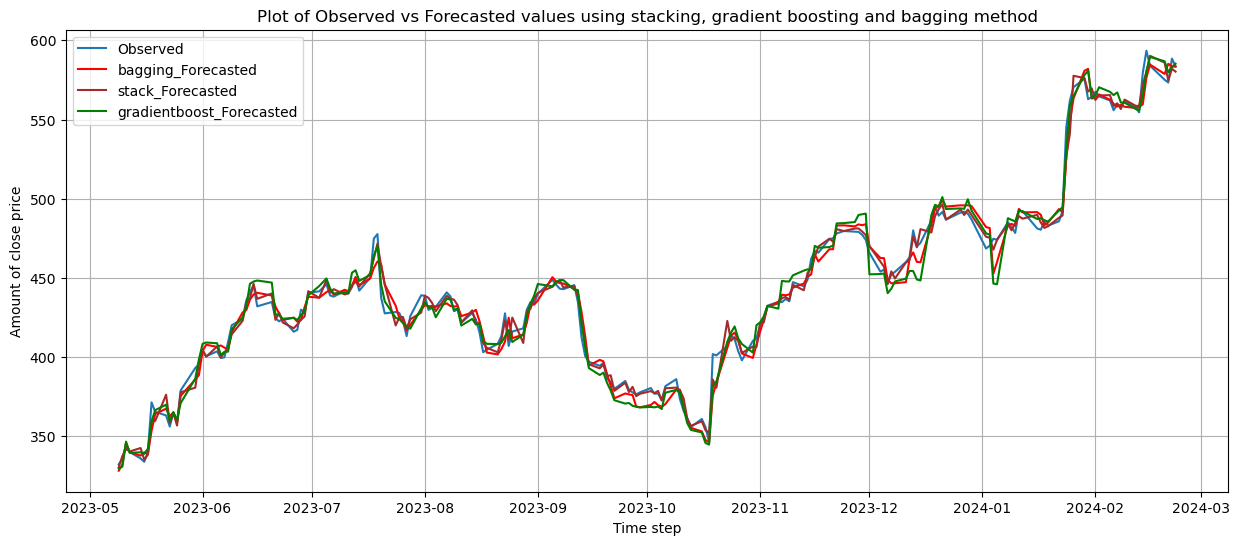

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('Netflixresult.png')
plt.show()

In [71]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 5.41, 0.01, 0.03, 28.18, 4.46])
task1_result.add_row(['XGboost',6.81, 0.02, 0.03, 31.81, 5.68])
task1_result.add_row(['GradientBoost', 6.40, 0.01, 0.01, 27.20, 5.40])
task1_result.add_row(['Catboost', 8.15, 0.02, 0.06, 37.24, 6.11])
task1_result.add_row(['Bagging', 5.67, 0.01, 0.01, 26.26, 4.23])
task1_result.add_row(['Stacking', 4.00, 0.01, 0.03, 21.31, 2.68])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     5.41    |     0.01     |      0.03     |     28.18     |      4.46     |
|    XGboost    |     6.81    |     0.02     |      0.03     |     31.81     |      5.68     |
| GradientBoost |     6.4     |     0.01     |      0.01     |      27.2     |      5.4      |
|    Catboost   |     8.15    |     0.02     |      0.06     |     37.24     |      6.11     |
|    Bagging    |     5.67    |     0.01     |      0.01     |     26.26     |      4.23     |
|    Stacking   |     4.0     |     0.01     |      0.03     |     21.31     |      2.68     |
+---------------+-------------+--------------+---------------+---------------+---------------+
